# Plotting with seaborn

In this notebook, we will explore our data further using seaborn for some fancy plotting. Based on these insights, we will do some exploratory statistical analysis later.

In [1]:
import numpy, pandas
import matplotlib.pyplot as pl
import seaborn
%matplotlib inline

seaborn.set_style("white")
seaborn.set(rc={'figure.figsize':(12,8)})

In [2]:
dataset = pandas.read_csv("final_dataset.csv")

dataset.head()

Year  quarter  citymarketid_1  citymarketid_2                       city1  \
0  2004        2           33851           34027           Oklahoma City, OK   
1  2012        2           31454           30476                 Orlando, FL   
2  2013        3           31267           32448                  Dayton, OH   
3  1999        2           33360           30852               Melbourne, FL   
4  2013        1           31871           32600  Greenville/Spartanburg, SC   

                                city2  nsmiles  passengers    fare carrier_lg  \
0      West Palm Beach/Palm Beach, FL     1197       10.87  242.51         DL   
1                      Shreveport, LA      796       40.10  271.03         DL   
2               Jackson/Vicksburg, MS      617       12.06  270.00         DL   
3  Washington, DC (Metropolitan Area)      796       90.54  180.30         DL   
4                     Little Rock, AR      569       10.77  300.34         DL   

   carrier_lg_full_name  large_ms  fare_lg carrier_low carrier_low_full_name  \
0  Delta Air Lines Inc.      0.51   235.98          DL  Delta Air Lines Inc.   
1  Delta Air Lines Inc.      0.64   252.43          DL  Delta Air Lines Inc.   
2  Delta Air Lines Inc.      0.64   267.98          DL  Delta Air Lines Inc.   
3  Delta Air Lines Inc.      0.96   177.83          DL  Delta Air Lines Inc.   
4  Delta Air Lines Inc.      0.68   292.30          DL  Delta Air Lines Inc.   

   lf_ms  fare_low  table_1_flag  \
0   0.51    235.98             0   
1   0.64    252.43             0   
2   0.64    267.98             0   
3   0.96    177.83             0   
4   0.68    292.30             0   

                                      Geocoded_City1  \
0         Oklahoma City, OK\n(35.468494, -97.521264)   
1               Orlando, FL\n(28.538331, -81.378879)   
2                Dayton, OH\n(39.760982, -84.192203)   
3             Melbourne, FL\n(28.079931, -80.603516)   
4  Greenville/Spartanburg, SC\n(44.513288, -88.01...   

                                      Geocoded_City2  
0  West Palm Beach/Palm Beach, FL\n(33.90976, -98...  
1             Shreveport, LA\n(32.51424, -93.747757)  
2      Jackson/Vicksburg, MS\n(30.325968, -81.65676)  
3  Washington, DC (Metropolitan Area)\n(38.892062...  
4           Little Rock, AR\n(34.748745, -92.275105)

In [3]:
print(dataset.shape)

col_names = dataset.columns

print(col_names)

(520323, 20)
Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'carrier_lg_full_name',
       'large_ms', 'fare_lg', 'carrier_low', 'carrier_low_full_name', 'lf_ms',
       'fare_low', 'table_1_flag', 'Geocoded_City1', 'Geocoded_City2'],
      dtype='object')


## 1. Scatter plots

Let's start with a scatter plot, which we saw in the previous chapter using built-in `pandas` methods.

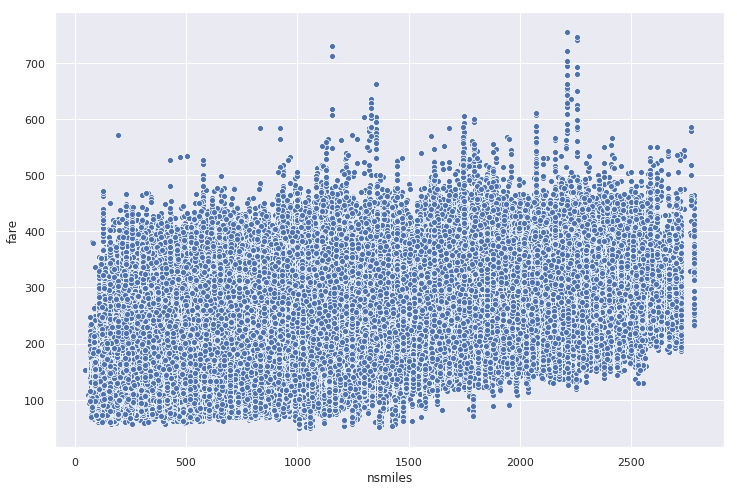

In [4]:
seaborn.scatterplot(x = 'nsmiles', y = 'fare', data = dataset)

pl.show()

We can represent a third dimension of information in the above plot!

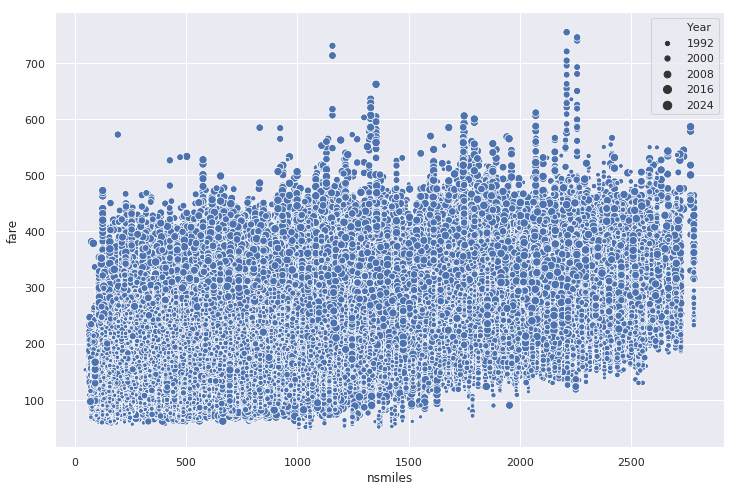

In [5]:
seaborn.scatterplot(x = 'nsmiles', y = 'fare', data = dataset, size = 'Year')

pl.show()

We can add a fourth dimesion by using colors on this plot

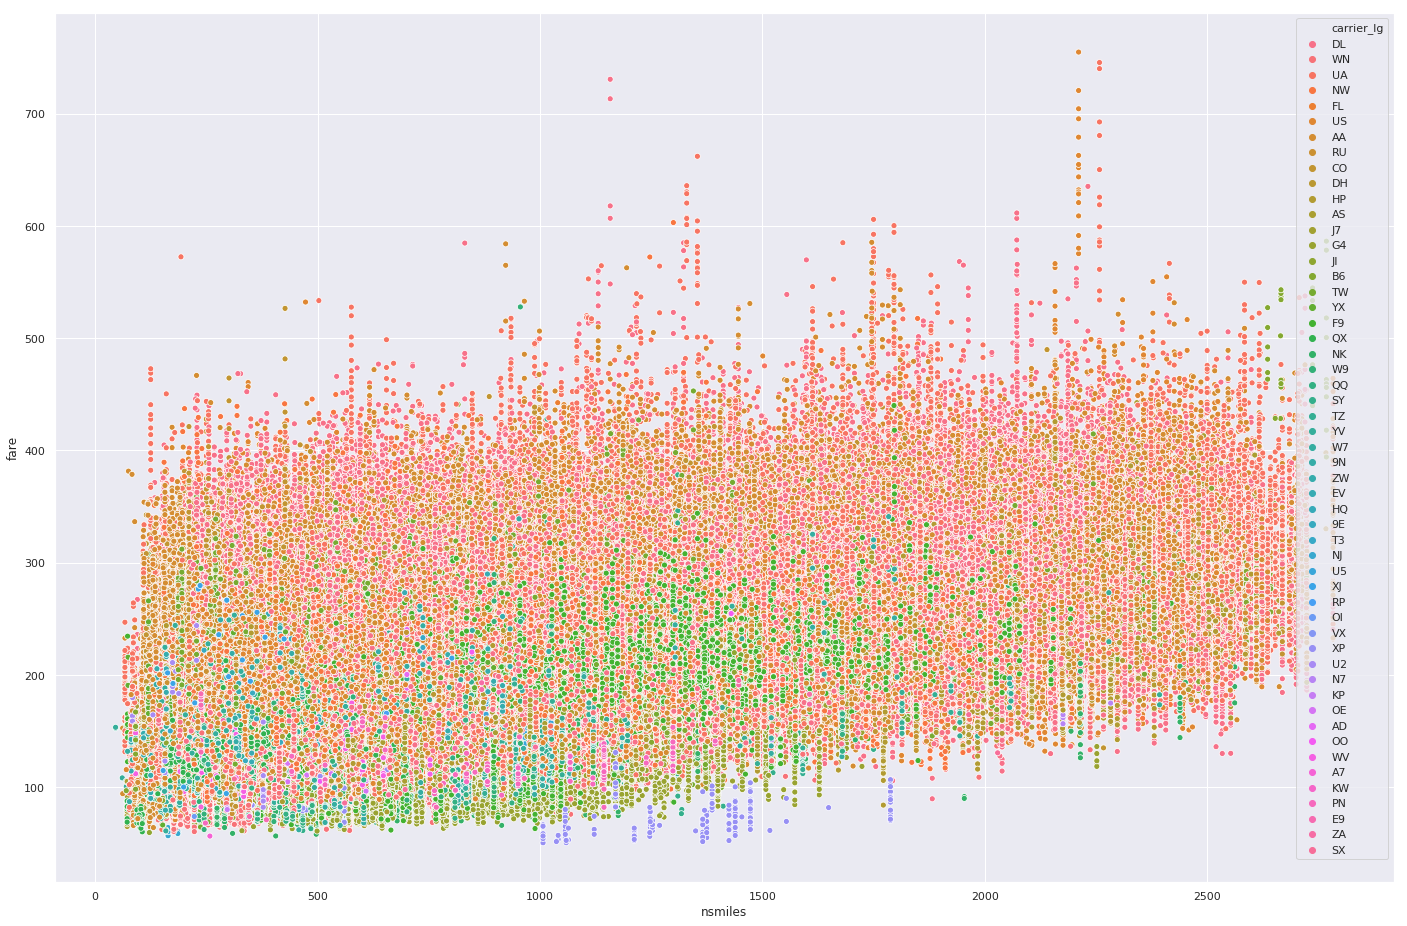

In [8]:
pl.figure(figsize = (24, 16))

seaborn.scatterplot(x = 'nsmiles', y = 'fare', data = dataset, 
                    hue = 'carrier_lg')

pl.show()

# 2. Distplot and histogram

We can make histograms, as well as fit them with a kernel density estimation (KDE) method built into seaborn. Unfortunately, there is no way to extract this fit from seaborn as of now.

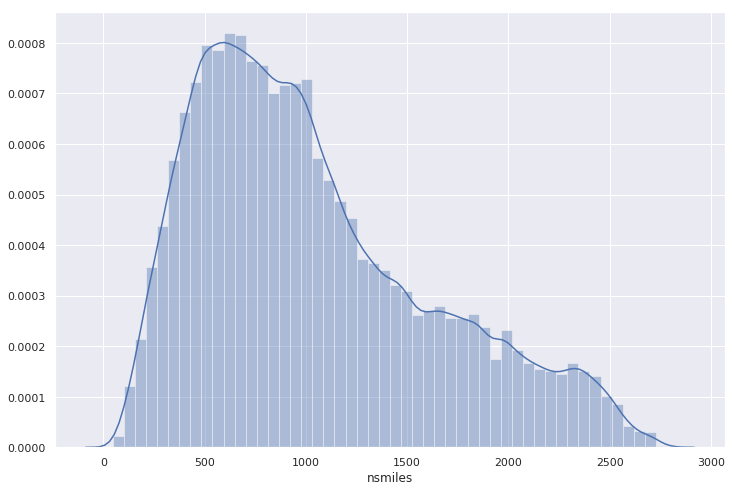

In [9]:
#The function to produce a distplot does not like NaNs, so let's get rid of them!

interest_var = dataset['nsmiles'][dataset['nsmiles'].notna()]

seaborn.distplot(interest_var,)

pl.show()

# 3. Jointplots

Seaborn has a nifty way to make and display both of the above plots together for a complete representation of the data.

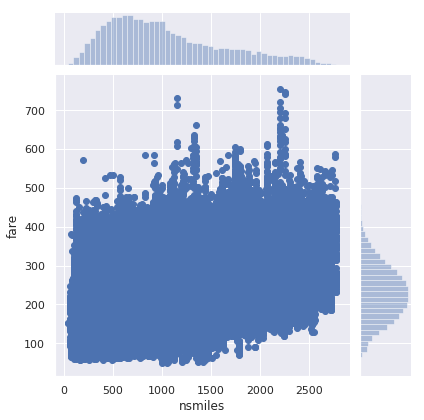

In [10]:
seaborn.jointplot(x = 'nsmiles', y = 'fare', data = dataset)

pl.show()

We can modify the `kind=` kw to make a different representation:

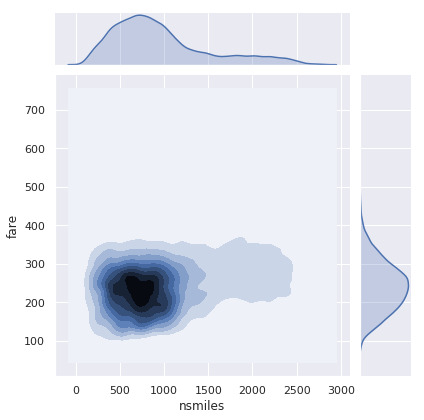

In [11]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'nsmiles', y = 'fare', data = dataset.iloc[:int(50e3), :],
                 kind = 'kde')

pl.show()

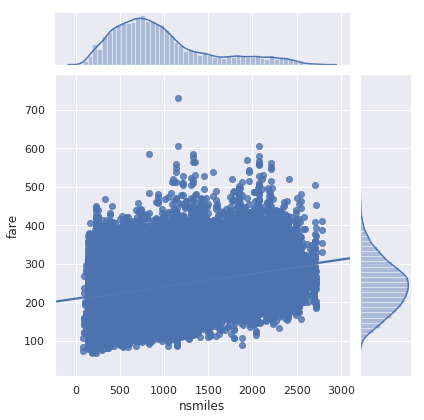

In [12]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'nsmiles', y = 'fare', data = dataset.iloc[:int(50e3), :],
                 kind = 'reg')

pl.show()

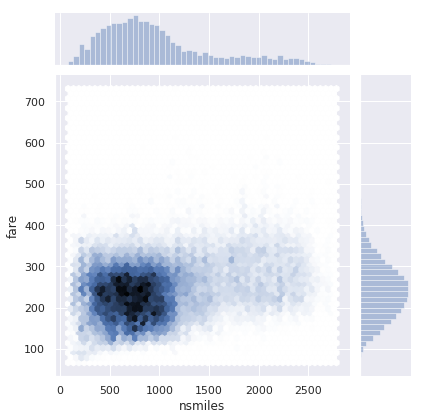

In [13]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'nsmiles', y = 'fare', data = dataset.iloc[:int(50e3), :],
                 kind = 'hex')

pl.show()

# 4. Categorical plots

Given a dataset that can be categorized in different categories (like this dataset), seaborn offers a large range of plots to investigate the categories individually.


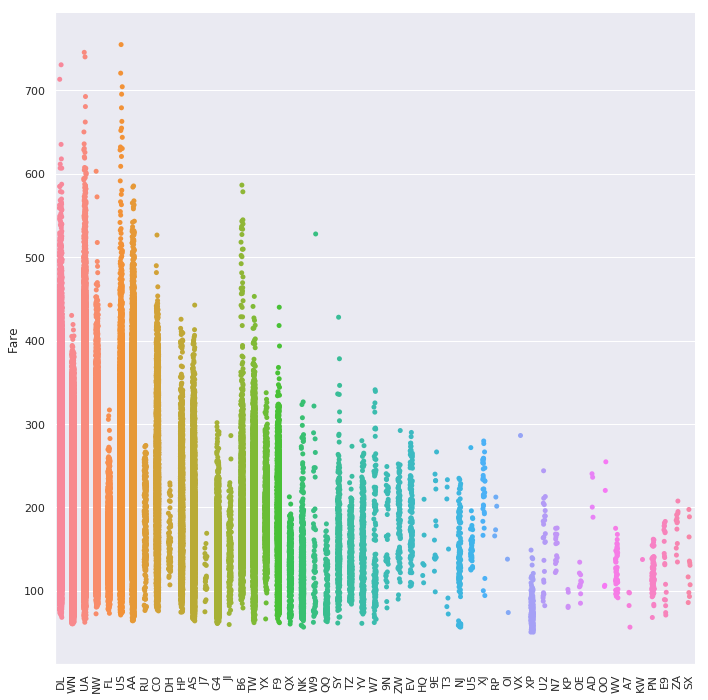

In [14]:
myplot = seaborn.catplot(x = 'carrier_lg', y = 'fare', data = dataset, height = 10,)

pl.xlabel("")
pl.ylabel("Fare")

pl.xticks(rotation = 90)

pl.show()

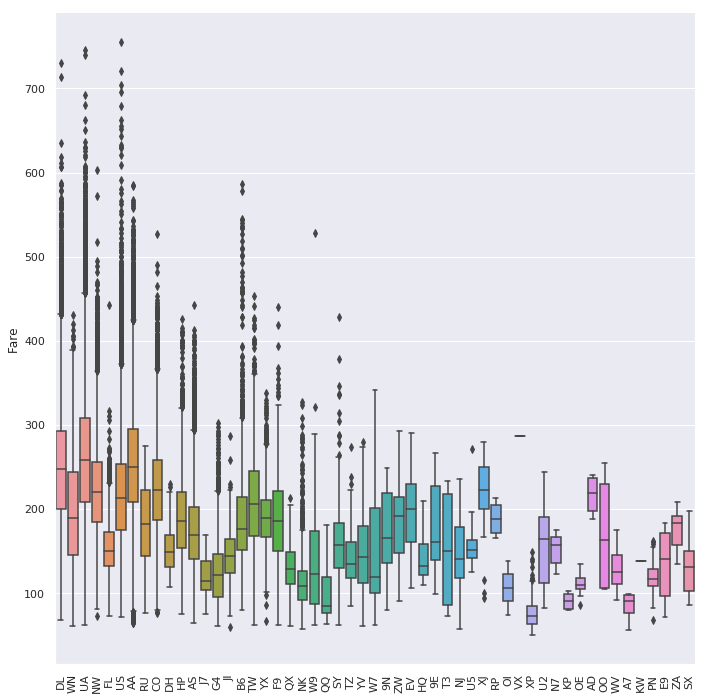

In [15]:
seaborn.catplot(x = 'carrier_lg', y = 'fare', data = dataset, height = 10,
               kind = 'box')

pl.xlabel("")
pl.ylabel("Fare")
#pl.title("10/2019")

pl.xticks(rotation = 90)

pl.show()

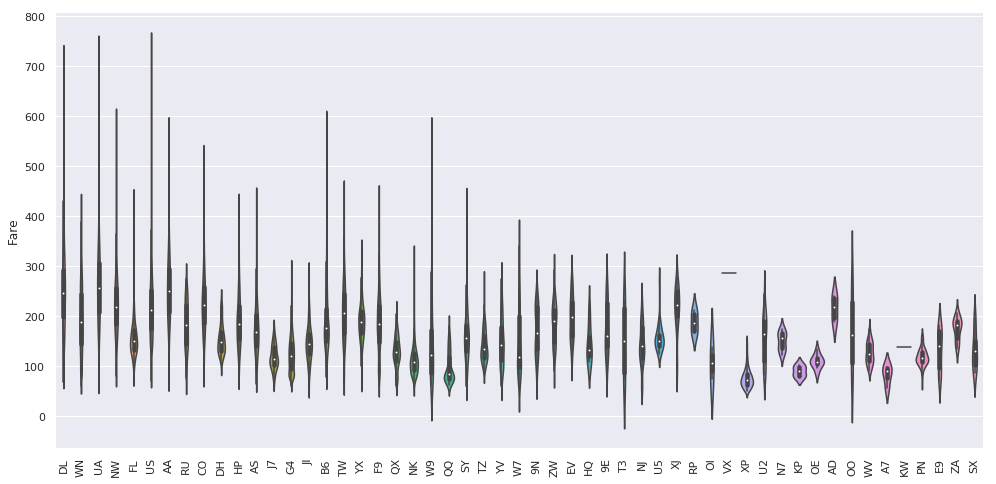

In [36]:

seaborn.catplot(x = 'carrier_lg', y = 'fare', data = dataset,
               kind = 'violin', aspect = 2, height = 7)

pl.xlabel("")
pl.ylabel("Fare")

pl.xticks(rotation = 90)

pl.show()

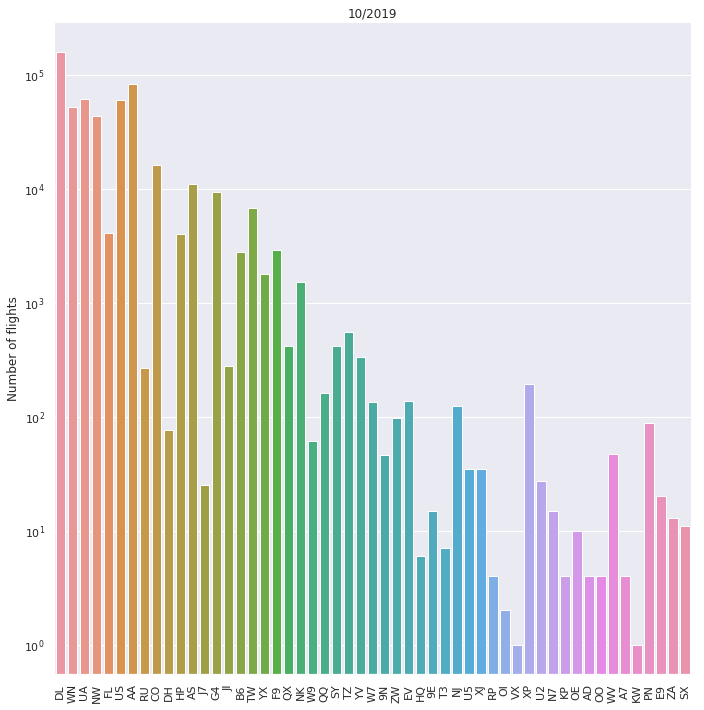

In [22]:
seaborn.catplot(x = 'carrier_lg', data = dataset, height = 10,
               kind = 'count')

pl.yscale('log')

pl.xlabel("")
pl.ylabel("Number of flights")
pl.title("10/2019")


pl.xticks(rotation = 90)

pl.show()

# 5. Visualizing regression fits to data

Seaborn offers functionality where it uses `scipy.statsmodels` under the hood to produce linear regression fits to the data and plot the results together.

**Note**: Seaborn is a visualization library and thus, does not return the best-fit model from its fitting routines.

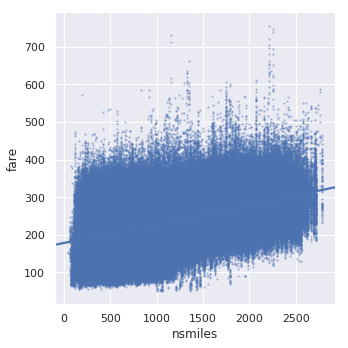

In [24]:
seaborn.lmplot(x = 'nsmiles', y = 'fare', data = dataset, scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

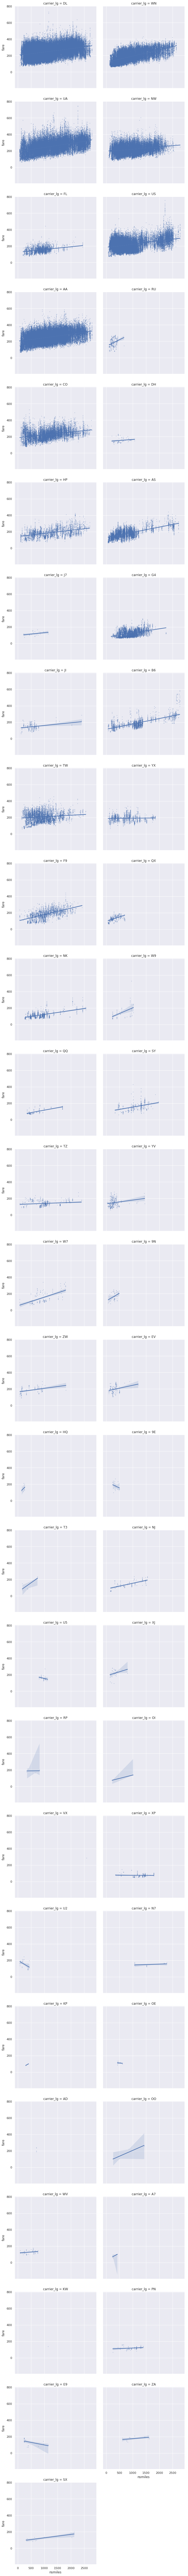

In [25]:
#Let's split the data up by airlines, with each airline in its own cell:
seaborn.lmplot(x = 'nsmiles', y = 'fare', data = dataset, truncate = True,
               col = 'carrier_lg', col_wrap = 2,
               scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

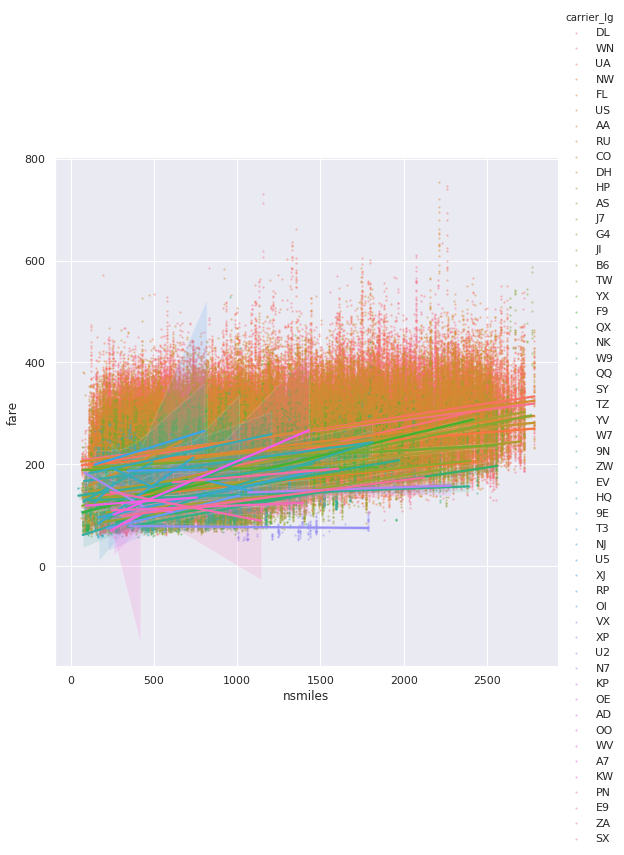

In [26]:
#Let's split the data up by airlines, with each airline in its own cell:
seaborn.lmplot(x = 'nsmiles', y = 'fare', data = dataset, truncate = True,
               hue = 'carrier_lg',
               height = 8,
               scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

# 6. Line plots

Finally, let's look at how to make line plots with seaborn

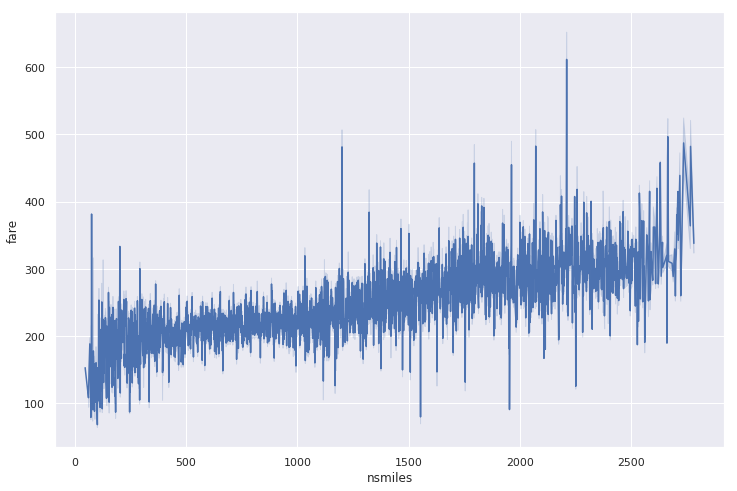

In [27]:
seaborn.lineplot(x = 'nsmiles', y = 'fare', data = dataset)

pl.show()

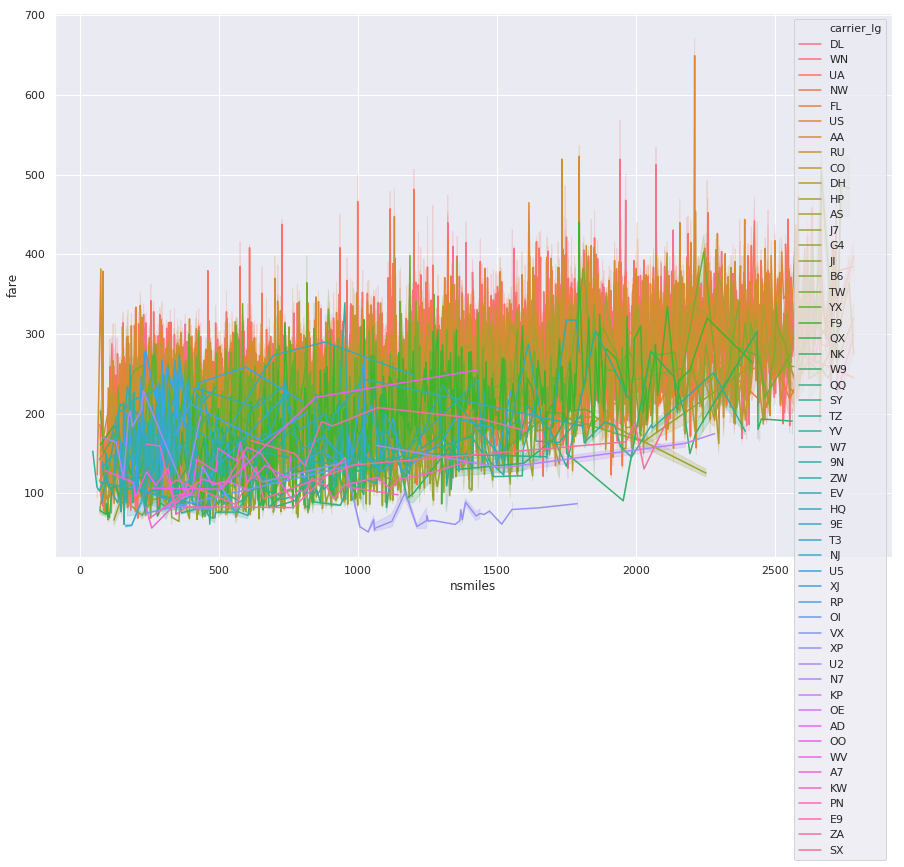

In [28]:
pl.figure(figsize = (15, 10))

seaborn.lineplot(x = 'nsmiles', y = 'fare', data = dataset,
                hue = 'carrier_lg')

pl.show()

We have barely scratched the surface with the diversity of plots that we can produce in Seaborn. Interested users are urged to check out the full documentation and example gallery of Seaborn [at this link](https://seaborn.pydata.org/index.html).